### Research Question: What mostly occurring programming languages do developers ask ChatGPT to rectify their bugs and solve their issues in?

### Name: Roochita Ikkurthy
### Pin: RI23B
### First step: Data Acquisition
### I have imported json and pandas for this step and then normalized each file and lastly concatenated into one file.

In [1]:
import json
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### COMMIT SHARING

In [2]:
file1_path = '20231012_230826_commit_sharings.json'
data = pd.read_json(file1_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

commit_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
commit_sharing

,RepoLanguage,Title,Prompt
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve..."
...,...,...,...
1597,HTML,Module Error in Browser.,FAIL ./game.test.js\n ● Test suite failed t...
1598,HTML,Module Error in Browser.,FAIL ./game.test.js\n ✕ check if startPlayi...
1599,HTML,Module Error in Browser.,we never changed index.html
1600,HTML,Module Error in Browser.,why am i back to inlining javascript


### Removing nan rows in commit file

In [3]:
commit_sharing.shape

(1602, 3)

In [4]:
null_values = commit_sharing[commit_sharing.isna().any(axis = 1)]

In [5]:
all_nan_rows = commit_sharing[commit_sharing.isna().all(axis = 1)]
all_nan_rows

,RepoLanguage,Title,Prompt


In [6]:
nan_rows = commit_sharing[commit_sharing.isna().sum(axis=1) == 1]
nan_rows

,RepoLanguage,Title,Prompt
23,None,قمصان لاعبي كرة القدم,اصنع لي html بقمصان لاعبين الكرة المشهورين
28,None,Create SQLite DB Packages,Write a function that can return the long desc...
29,None,Create SQLite DB Packages,Yes
30,None,Create SQLite DB Packages,Use the file to visualize the trends in length...
31,None,Create SQLite DB Packages,Go
32,None,Create SQLite DB Packages,What are the five longest?
33,None,Create SQLite DB Packages,What format are they - markdown or rST or other?
34,None,Create SQLite DB Packages,Come up with some heuristics and apply them to...
35,None,Create SQLite DB Packages,Show me some random snippets from unknown
36,None,Create SQLite DB Packages,Show me the gradio one


In [7]:
commit_sharing1 = commit_sharing.copy()
commit_sharing1.dropna(inplace = True)

### COMMIT DF

In [8]:
commit_sharing1

,RepoLanguage,Title,Prompt
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve..."
...,...,...,...
1597,HTML,Module Error in Browser.,FAIL ./game.test.js\n ● Test suite failed t...
1598,HTML,Module Error in Browser.,FAIL ./game.test.js\n ✕ check if startPlayi...
1599,HTML,Module Error in Browser.,we never changed index.html
1600,HTML,Module Error in Browser.,why am i back to inlining javascript


### DISCUSSION SHARING

In [38]:
file2_path = '20231012_235320_discussion_sharings.json'
data = pd.read_json(file2_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

discussion_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
discussion_sharing

,RepoLanguage,Title,Prompt
0,Jupyter Notebook,ONNX Model Visualization Tools,什么是ONNX模型？我是一名新生，您是世界上最好的老师，也是最优秀的工程师和研究人员。能否指...
1,Jupyter Notebook,ONNX Model Visualization Tools,那他们和torch tensorflow的区别在哪里呢
2,Jupyter Notebook,ONNX Model Visualization Tools,他们都是图结构的吗
3,TypeScript,Vue 3 List Watch,I have a vue 3 application. I have a ref const...
4,None,跨界与守界的屠呦呦,使以下文章更有逻辑性\n\n屠呦呦究竟是跨界者还是守界者\n\n时光如白驹过隙，社会百态瞬息...
...,...,...,...
218,HTML,Create Nested Directories Command,received this error code when verifying the st...
219,HTML,Create Nested Directories Command,now create a how to use the command line to cr...
220,HTML,Create Nested Directories Command,the echo command is not working
221,HTML,Create Nested Directories Command,the echo command is still not working on windo...


### Removing nan rows in Discussion file

In [39]:
discussion_sharing.shape

(223, 3)

In [40]:
null_values = discussion_sharing[discussion_sharing.isna().any(axis = 1)]

In [41]:
all_nan_rows = discussion_sharing[discussion_sharing.isna().all(axis = 1)]
all_nan_rows

,RepoLanguage,Title,Prompt


In [42]:
nan_rows = discussion_sharing[discussion_sharing.isna().sum(axis=1) == 1]
nan_rows

,RepoLanguage,Title,Prompt
4,None,跨界与守界的屠呦呦,使以下文章更有逻辑性\n\n屠呦呦究竟是跨界者还是守界者\n\n时光如白驹过隙，社会百态瞬息...
8,None,await import vs plain import,Can I always use await import instead of plain...
9,None,await import vs plain import,Can I always use await import instead of plain...
10,None,Mr. Ranedeer v2.7 (CODE INTERPRETER ONLY),"===\nAuthor: JushBJJ\nName: ""Mr. Ranedeer""\nVe..."
11,None,Mr. Ranedeer's Wizard,"[Personalization Options]\n Language: [""Eng..."
117,None,JSON Schema vs JSON:LD vs RDF,We are using JSON Schema to describe farm mana...
118,None,JSON Schema vs JSON:LD vs RDF,"You said ""extend your data representation into..."
119,None,JSON Schema vs JSON:LD vs RDF,Can you extend the existing examples with a JS...
120,None,JSON Schema vs JSON:LD vs RDF,Ok - so that's interesting. It seems that the...
121,None,JSON Schema vs JSON:LD vs RDF,Ok - thanks. I have another question. I coul...


In [43]:
discussion_sharing1 = discussion_sharing.copy()
discussion_sharing1.dropna(inplace = True)

### DISCUSSION DF

In [44]:
discussion_sharing1

,RepoLanguage,Title,Prompt
0,Jupyter Notebook,ONNX Model Visualization Tools,什么是ONNX模型？我是一名新生，您是世界上最好的老师，也是最优秀的工程师和研究人员。能否指...
1,Jupyter Notebook,ONNX Model Visualization Tools,那他们和torch tensorflow的区别在哪里呢
2,Jupyter Notebook,ONNX Model Visualization Tools,他们都是图结构的吗
3,TypeScript,Vue 3 List Watch,I have a vue 3 application. I have a ref const...
5,Go,Migrate Files from Git LFS,migrate back to git files tracked by GIT LFS
...,...,...,...
218,HTML,Create Nested Directories Command,received this error code when verifying the st...
219,HTML,Create Nested Directories Command,now create a how to use the command line to cr...
220,HTML,Create Nested Directories Command,the echo command is not working
221,HTML,Create Nested Directories Command,the echo command is still not working on windo...


### ISSUE SHARING

In [45]:
file3_path = '20231012_235128_issue_sharings.json'
data = pd.read_json(file3_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

issue_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
issue_sharing

,RepoLanguage,Title,Prompt
0,None,Raspberry Pi Wi-Fi診断,Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...
1,None,Raspberry Pi Wi-Fi診断,Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...
2,None,Raspberry Pi Wi-Fi診断,上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？
3,None,iperfコマンドの説明,iperfってどんなコマンドですか？中学生にもわかるように説明して
4,None,iperfコマンドの説明,どういった出力結果がでる？
...,...,...,...
2027,Jupyter Notebook,Rewriting FSRS Tutorial,continue
2028,Jupyter Notebook,Rewriting FSRS Tutorial,proceed
2029,TypeScript,TypeScript: No Checked Exceptions,I wish that in typescript I could mark a funct...
2030,TypeScript,TypeScript: No Checked Exceptions,Are there no other options that use static ana...


### Removing nan rows in issue file

In [46]:
issue_sharing.shape

(2032, 3)

In [47]:
null_values = issue_sharing[issue_sharing.isna().any(axis = 1)]

In [48]:
all_nan_rows = issue_sharing[issue_sharing.isna().all(axis = 1)]
all_nan_rows

,RepoLanguage,Title,Prompt


In [49]:
nan_rows = issue_sharing[issue_sharing.isna().sum(axis=1) == 1]
nan_rows

,RepoLanguage,Title,Prompt
0,None,Raspberry Pi Wi-Fi診断,Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...
1,None,Raspberry Pi Wi-Fi診断,Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...
2,None,Raspberry Pi Wi-Fi診断,上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？
3,None,iperfコマンドの説明,iperfってどんなコマンドですか？中学生にもわかるように説明して
4,None,iperfコマンドの説明,どういった出力結果がでる？
...,...,...,...
1894,None,AHC Treatment Compounds,what compounds may treat Alternating Hemiplegi...
1895,None,AHC Treatment Compounds List,Give me a list of 100 compounds (molecules) th...
1896,None,AHC Treatment Compounds,what compounds may treat Alternating Hemiplegi...
1897,None,AHC Treatment Compounds,what compounds may treat Alternating Hemiplegi...


In [50]:
issue_sharing1 = issue_sharing.copy()
issue_sharing1.dropna(inplace = True)

### ISSUE DF

In [51]:
issue_sharing1

,RepoLanguage,Title,Prompt
7,TypeScript,AI for Literacy Queries,You are an expert search query generator.\n\nI...
8,TypeScript,Literacy Gap Root Causes,Please analyse the text below to find the root...
9,Java,EdgeChains: Generative AI Language,https://github.com/arakoodev/EdgeChains
10,Java,EdgeChains: Generative AI Language,can this be used from python:\nhttps://github....
11,Java,EdgeChains: Generative AI Language,give me an example
...,...,...,...
2027,Jupyter Notebook,Rewriting FSRS Tutorial,continue
2028,Jupyter Notebook,Rewriting FSRS Tutorial,proceed
2029,TypeScript,TypeScript: No Checked Exceptions,I wish that in typescript I could mark a funct...
2030,TypeScript,TypeScript: No Checked Exceptions,Are there no other options that use static ana...


### FILE SHARING

In [52]:
file4_path = '20231012_234250_file_sharings.json'
data = pd.read_json(file3_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

file_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
file_sharing

,RepoLanguage,Title,Prompt
0,None,Raspberry Pi Wi-Fi診断,Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...
1,None,Raspberry Pi Wi-Fi診断,Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...
2,None,Raspberry Pi Wi-Fi診断,上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？
3,None,iperfコマンドの説明,iperfってどんなコマンドですか？中学生にもわかるように説明して
4,None,iperfコマンドの説明,どういった出力結果がでる？
...,...,...,...
2027,Jupyter Notebook,Rewriting FSRS Tutorial,continue
2028,Jupyter Notebook,Rewriting FSRS Tutorial,proceed
2029,TypeScript,TypeScript: No Checked Exceptions,I wish that in typescript I could mark a funct...
2030,TypeScript,TypeScript: No Checked Exceptions,Are there no other options that use static ana...


### Removing nan rows in file sharing

In [53]:
file_sharing.shape

(2032, 3)

In [54]:
null_values = file_sharing[file_sharing.isna().any(axis = 1)]

In [55]:
all_nan_rows = file_sharing[file_sharing.isna().all(axis = 1)]
all_nan_rows

,RepoLanguage,Title,Prompt


In [56]:
nan_rows = file_sharing[file_sharing.isna().sum(axis=1) == 1]
nan_rows

,RepoLanguage,Title,Prompt
0,None,Raspberry Pi Wi-Fi診断,Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...
1,None,Raspberry Pi Wi-Fi診断,Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...
2,None,Raspberry Pi Wi-Fi診断,上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？
3,None,iperfコマンドの説明,iperfってどんなコマンドですか？中学生にもわかるように説明して
4,None,iperfコマンドの説明,どういった出力結果がでる？
...,...,...,...
1894,None,AHC Treatment Compounds,what compounds may treat Alternating Hemiplegi...
1895,None,AHC Treatment Compounds List,Give me a list of 100 compounds (molecules) th...
1896,None,AHC Treatment Compounds,what compounds may treat Alternating Hemiplegi...
1897,None,AHC Treatment Compounds,what compounds may treat Alternating Hemiplegi...


In [57]:
file_sharing1 = file_sharing.copy()
file_sharing1.dropna(inplace = True)

### FILE SHARING DF

In [58]:
file_sharing1

,RepoLanguage,Title,Prompt
7,TypeScript,AI for Literacy Queries,You are an expert search query generator.\n\nI...
8,TypeScript,Literacy Gap Root Causes,Please analyse the text below to find the root...
9,Java,EdgeChains: Generative AI Language,https://github.com/arakoodev/EdgeChains
10,Java,EdgeChains: Generative AI Language,can this be used from python:\nhttps://github....
11,Java,EdgeChains: Generative AI Language,give me an example
...,...,...,...
2027,Jupyter Notebook,Rewriting FSRS Tutorial,continue
2028,Jupyter Notebook,Rewriting FSRS Tutorial,proceed
2029,TypeScript,TypeScript: No Checked Exceptions,I wish that in typescript I could mark a funct...
2030,TypeScript,TypeScript: No Checked Exceptions,Are there no other options that use static ana...


### PR SHARING

In [59]:
file5_path = '20231012_233628_pr_sharings.json'
data = pd.read_json(file5_path)
df1 = [
    pd.json_normalize(sharing, record_path='Conversations')
    .assign(
        RepoLanguage=item.get('RepoLanguage', None),
        Title=sharing.get('Title', None)
    )
    for item in data['Sources']
    if 'ChatgptSharing' in item
    for sharing in item['ChatgptSharing']
    if 'Conversations' in sharing
]

df = pd.concat(df1, ignore_index=True)

pr_sharing = df[['RepoLanguage', 'Title', 'Prompt']]
pr_sharing

,RepoLanguage,Title,Prompt
0,JavaScript,Regex Testing Assistance,can u be my regex tester
1,JavaScript,Regex Testing Assistance,/^(\+?98[\-\s]?|0)9[0-39]\d[\-\s]?\d{3}[\-\s]?...
2,JavaScript,Imperative vs Declarative Programming,Explain the difference between imperative and ...
3,TypeScript,Avoid Prototype Chain Issue,I have this code:\n\nconst characterMap: Chara...
4,Go,Empty String in Base64,"Hello ChatGPT, do you know if an empty string ..."
...,...,...,...
991,C++,Understanding Grid Size Calculation,what would be a good name for this test?
992,C++,用語の選択,こちらの変更に対して、\n\n- /// 与えられたパスからモデルを取得する\n+ ...
993,C++,Mutating Properties in Rust,Here is some rust code:\n\n```\nlet conn =\n ...
994,C++,Rustでのデフォルト関数,この2つの処理は一緒でしょうか？\n\nconst convertHankakuToZenk...


### Removing nan rows in PR file

In [60]:
pr_sharing.shape

(996, 3)

In [61]:
null_values = pr_sharing[pr_sharing.isna().any(axis = 1)]

In [62]:
all_nan_rows = pr_sharing[pr_sharing.isna().all(axis = 1)]
all_nan_rows

,RepoLanguage,Title,Prompt


In [63]:
nan_rows = pr_sharing[pr_sharing.isna().sum(axis=1) == 1]
nan_rows

,RepoLanguage,Title,Prompt
6,None,Interpret SVG Path Syntax,Can you interpret this SVG path syntax? <path ...
7,None,Interpret SVG Path Syntax,This is supposed to be within a 100x100 viewbo...
86,None,GitHub Pages with PlantUML,I want to create a GitHub Action to turn my Ma...
347,None,Spotify Auth Flows,What is the difference between SpotifyClientCr...
548,None,Google's Monopoly Enforcer,Google is proposing a web standard on GitHub t...


In [64]:
pr_sharing1 = pr_sharing.copy()
pr_sharing1.dropna(inplace = True)

### PR SHARING DF

In [65]:
pr_sharing1

,RepoLanguage,Title,Prompt
0,JavaScript,Regex Testing Assistance,can u be my regex tester
1,JavaScript,Regex Testing Assistance,/^(\+?98[\-\s]?|0)9[0-39]\d[\-\s]?\d{3}[\-\s]?...
2,JavaScript,Imperative vs Declarative Programming,Explain the difference between imperative and ...
3,TypeScript,Avoid Prototype Chain Issue,I have this code:\n\nconst characterMap: Chara...
4,Go,Empty String in Base64,"Hello ChatGPT, do you know if an empty string ..."
...,...,...,...
991,C++,Understanding Grid Size Calculation,what would be a good name for this test?
992,C++,用語の選択,こちらの変更に対して、\n\n- /// 与えられたパスからモデルを取得する\n+ ...
993,C++,Mutating Properties in Rust,Here is some rust code:\n\n```\nlet conn =\n ...
994,C++,Rustでのデフォルト関数,この2つの処理は一緒でしょうか？\n\nconst convertHankakuToZenk...


### FINAL DF: COMBINING ALL FIVE FILES

In [66]:
final_df = pd.concat([commit_sharing1, discussion_sharing1, issue_sharing1, file_sharing1, pr_sharing1])
final_df

,RepoLanguage,Title,Prompt
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve..."
...,...,...,...
991,C++,Understanding Grid Size Calculation,what would be a good name for this test?
992,C++,用語の選択,こちらの変更に対して、\n\n- /// 与えられたパスからモデルを取得する\n+ ...
993,C++,Mutating Properties in Rust,Here is some rust code:\n\n```\nlet conn =\n ...
994,C++,Rustでのデフォルト関数,この2つの処理は一緒でしょうか？\n\nconst convertHankakuToZenk...


### INSTALLING LANGUAGE DETECT
#### TO REMOVE NON-ENGLISH WORDS FOR THE ANALYSIS

In [67]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


### Analysis on Commit sharing

In [68]:
import langdetect
from nltk.tokenize import word_tokenize

def commit_prompts(prompt):
    try:
        language = langdetect.detect(prompt)
        if language != 'en':
            return 'Non-English'
    except langdetect.lang_detect_exception.LangDetectException:
        # Handle the case where language detection fails
        pass
    
    prompt = prompt.lower()
    categories = {
        "Bugs": ["refactor", "code","problem", "bug", "issue", "analysis", "Exception handling", "Exception", "handling", "leaks", "debugging"],
        "Features": ["filter","list", "sort","feature", "enhancement", "add", "improve", "Optimize", "Optimization", "experience", "Scalability", "strategies"],
        "Errors": ["files","class","error", "failed", "crash", "exception", "error message", "compatibility", "validation", "null pointer", "concurrency"],
        "Test": ["need", "test", "check", "compare", "affect", "unit", "integration", "coverage", "end-to-end", "regression", "mocking", "stubbing","WebDriver", "Selenium",
                "Production", "Docker", "Agile", "Waterfall"]
    }

    tokens = word_tokenize(prompt)

    for category, keywords in categories.items():
        if any(keyword in tokens for keyword in keywords):
            return category
    return "Other"

# Apply the categorize_prompt function using a lambda function
commit_sharing1['Category'] = commit_sharing1['Prompt'].apply(lambda x: commit_prompts(x))

# Print the DataFrame with the added 'Category' column
print(commit_sharing1.head())

commit_data = pd.DataFrame(commit_sharing1)
commit_data.head(10)

  RepoLanguage                                              Title  \
0         HTML                         Adjust Button for Keyboard   
1         HTML  I am ChatGPT, a language model AI developed by...   
2         HTML                       Refactor HTML and JavaScript   
3          CSS                           Server Code Organization   
4          CSS                           Server Code Organization   

                                              Prompt Category  
0  このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...    Other  
1  このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...    Other  
2  refactor this code.\n\n<!DOCTYPE html>\n<html>...     Bugs  
3  server.js\n// Required libraries\nimport cors ...     Bugs  
4  package.json\n{\n  "name": "mindfulai",\n  "ve...     Bugs  


,RepoLanguage,Title,Prompt,Category
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...,Other
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...,Other
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...,Bugs
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...,Bugs
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",Bugs
5,CSS,Server Code Organization,\n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...,Bugs
6,CSS,Server Code Organization,\n/home/bitnami/.pm2/logs/Mindful-AI-out-0.log...,Errors
7,CSS,Server Code Organization,\nimport PromptGPT from './PromptGPT.js';\nexp...,Non-English
8,JavaScript,FetchBook CLI - Manage HTTP,write a readme file for this cli:\n\nimport { ...,Other
9,JavaScript,FetchBook CLI - Manage HTTP,story files are esm modules that must comply w...,Errors


In [70]:
commit_final = commit_data[commit_data['Category'] != 'Non-English']
commit_final

,RepoLanguage,Title,Prompt,Category
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...,Other
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...,Other
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...,Bugs
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...,Bugs
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",Bugs
...,...,...,...,...
1596,HTML,Module Error in Browser.,FAIL ./game.test.js\n ● Test suite failed t...,Errors
1597,HTML,Module Error in Browser.,FAIL ./game.test.js\n ● Test suite failed t...,Errors
1598,HTML,Module Error in Browser.,FAIL ./game.test.js\n ✕ check if startPlayi...,Errors
1600,HTML,Module Error in Browser.,why am i back to inlining javascript,Other


### Visualization of programming languages used in Commit file

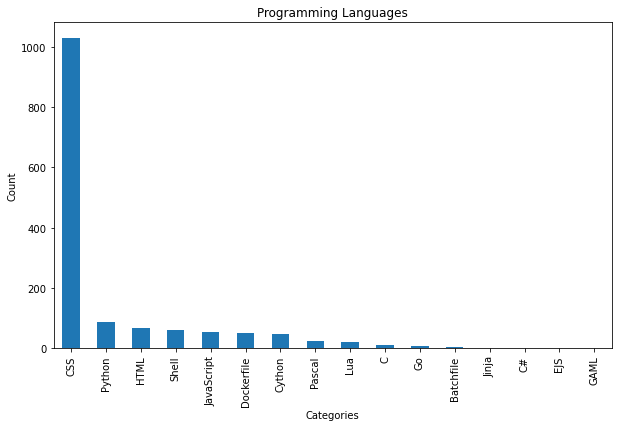

In [71]:
import matplotlib.pyplot as plt

commit_proglang = commit_final['RepoLanguage'].value_counts()
# Increase the width by setting the figsize
plt.figure(figsize=(10, 6))

# Plot the bar chart
commit_proglang.plot(kind='bar')

# Customize the plot
plt.title('Programming Languages')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()

### Visualization of category in commit file
#### We can see that the developers raised more questions regarding bugs to solve to chatgpt

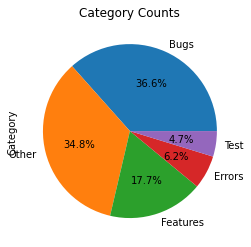

In [99]:
commit_category = commit_final['Category'].value_counts()
commit_category.plot(kind='pie', autopct='%1.1f%%')

# Customize the plot
plt.title('Category Counts')
# Show the plot
plt.show()

### Grouping RepoLanguage and Category 
#### C++ was used more number of times and we can say that developers asked more questions related to bugs in C++

<Figure size 720x576 with 0 Axes>

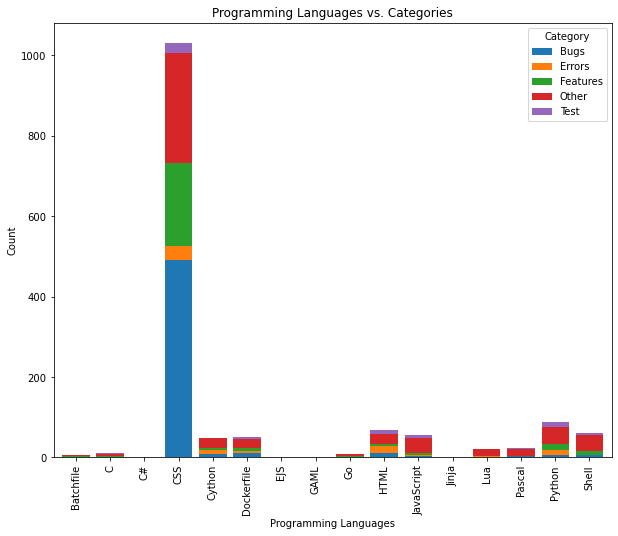

In [116]:
# Grouping data
import matplotlib.pyplot as plt
commit_grouped_data = commit_final.groupby(['RepoLanguage', 'Category']).size().unstack().fillna(0)

# Sorting columns in increasing order
commit_grouped_data = commit_grouped_data.reindex(sorted(commit_grouped_data.columns), axis=1)

# Plotting with adjusted width
plt.figure(figsize=(10, 8))
commit_grouped_data.plot(kind='bar', stacked=True, width = 0.8, figsize=(10, 8))  # Adjust the width as needed
plt.title('Programming Languages vs. Categories')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.show()


### Analysis on discussion sharing

In [75]:
import langdetect
from nltk.tokenize import word_tokenize

def discussion_prompts(prompt):
    try:
        language = langdetect.detect(prompt)
        if language != 'en':
            return 'Non-English'
    except langdetect.lang_detect_exception.LangDetectException:
        # Handle the case where language detection fails
        pass
    
    prompt = prompt.lower()
    categories = {
        "Bugs": ["refactor", "code","problem", "bug", "issue", "analysis", "Exception handling", "Exception", "handling", "leaks", "debugging"],
        "Features": ["filter","list", "sort","feature", "enhancement", "add", "improve", "Optimize", "Optimization", "experience", "Scalability", "strategies"],
        "Errors": ["files","class","error", "failed", "crash", "exception", "error message", "compatibility", "validation", "null pointer", "concurrency"],
        "Test": ["need", "test", "check", "compare", "affect", "unit", "integration", "coverage", "end-to-end", "regression", "mocking", "stubbing","WebDriver", "Selenium",
                "Production", "Docker", "Agile", "Waterfall"]
    }

    tokens = word_tokenize(prompt)

    for category, keywords in categories.items():
        if any(keyword in tokens for keyword in keywords):
            return category
    return "Other"

# Apply the categorize_prompt function using a lambda function
discussion_sharing1['Category'] = discussion_sharing1['Prompt'].apply(lambda x: discussion_prompts(x))

# Print the DataFrame with the added 'Category' column
print(discussion_sharing1.head())

discussion_data = pd.DataFrame(discussion_sharing1)
discussion_data.head(10)

       RepoLanguage                           Title  \
0  Jupyter Notebook  ONNX Model Visualization Tools   
1  Jupyter Notebook  ONNX Model Visualization Tools   
2  Jupyter Notebook  ONNX Model Visualization Tools   
3        TypeScript                Vue 3 List Watch   
5                Go      Migrate Files from Git LFS   

                                              Prompt     Category  
0  什么是ONNX模型？我是一名新生，您是世界上最好的老师，也是最优秀的工程师和研究人员。能否指...  Non-English  
1                        那他们和torch tensorflow的区别在哪里呢        Other  
2                                          他们都是图结构的吗  Non-English  
3  I have a vue 3 application. I have a ref const...     Features  
5       migrate back to git files tracked by GIT LFS       Errors  


,RepoLanguage,Title,Prompt,Category
0,Jupyter Notebook,ONNX Model Visualization Tools,什么是ONNX模型？我是一名新生，您是世界上最好的老师，也是最优秀的工程师和研究人员。能否指...,Non-English
1,Jupyter Notebook,ONNX Model Visualization Tools,那他们和torch tensorflow的区别在哪里呢,Other
2,Jupyter Notebook,ONNX Model Visualization Tools,他们都是图结构的吗,Non-English
3,TypeScript,Vue 3 List Watch,I have a vue 3 application. I have a ref const...,Features
5,Go,Migrate Files from Git LFS,migrate back to git files tracked by GIT LFS,Errors
6,TypeScript,생성 랜덤 ID JavaScript,자바스크립트로 랜덤한 id를 생성하는 함수 코드를 알려줘.,Non-English
7,Ruby,Dockerfile with AWS Variables.,generate missing code in the below dockerfile\...,Bugs
12,Emacs Lisp,Clojure Completion Backend.,Please assume the role of a Clojure code compl...,Bugs
13,Emacs Lisp,Clojure Completion Backend.,The Clojure file contents are as follows:\n\n`...,Other
14,TypeScript,New chat,This is likely a very basic networking questio...,Bugs


In [76]:
discussion_final = discussion_data[discussion_data['Category'] != 'Non-English']
discussion_final

,RepoLanguage,Title,Prompt,Category
1,Jupyter Notebook,ONNX Model Visualization Tools,那他们和torch tensorflow的区别在哪里呢,Other
3,TypeScript,Vue 3 List Watch,I have a vue 3 application. I have a ref const...,Features
5,Go,Migrate Files from Git LFS,migrate back to git files tracked by GIT LFS,Errors
7,Ruby,Dockerfile with AWS Variables.,generate missing code in the below dockerfile\...,Bugs
12,Emacs Lisp,Clojure Completion Backend.,Please assume the role of a Clojure code compl...,Bugs
...,...,...,...,...
218,HTML,Create Nested Directories Command,received this error code when verifying the st...,Bugs
219,HTML,Create Nested Directories Command,now create a how to use the command line to cr...,Other
220,HTML,Create Nested Directories Command,the echo command is not working,Other
221,HTML,Create Nested Directories Command,the echo command is still not working on windo...,Other


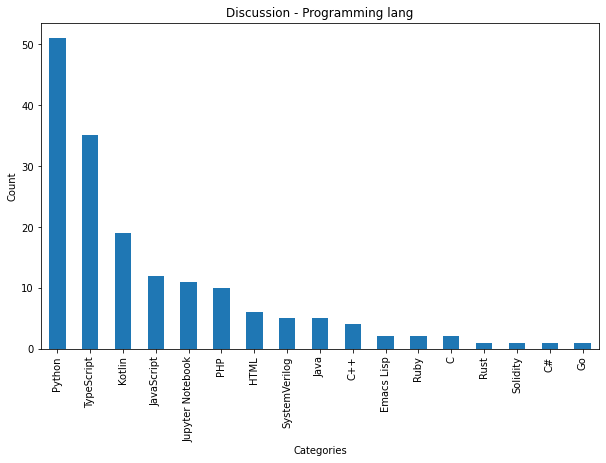

In [78]:
import matplotlib.pyplot as plt

discussion_proglang = discussion_final['RepoLanguage'].value_counts()
# Increase the width by setting the figsize
plt.figure(figsize=(10, 6))

# Plot the bar chart
discussion_proglang.plot(kind='bar')

# Customize the plot
plt.title('Discussion - Programming lang')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()

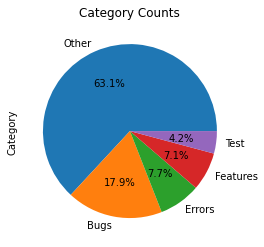

In [100]:
discussion_category = discussion_final['Category'].value_counts()
discussion_category.plot(kind='pie', autopct='%1.1f%%')

# Customize the plot
plt.title('Category Counts')
# Show the plot
plt.show()

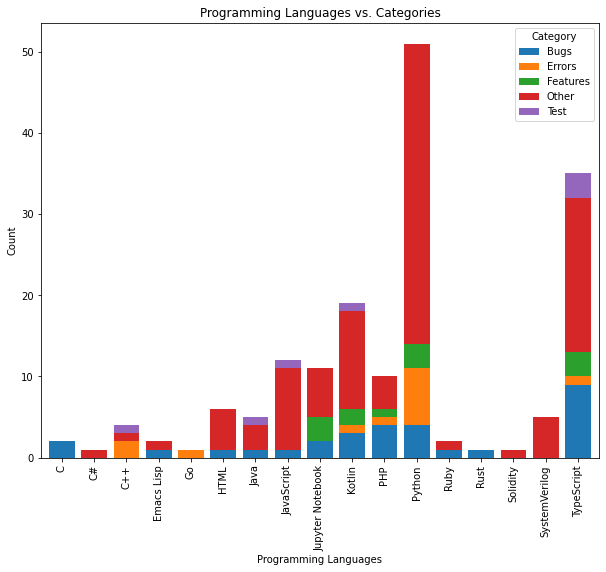

In [117]:
# Grouping data
import matplotlib.pyplot as plt
discussion_grouped_data = discussion_final.groupby(['RepoLanguage', 'Category']).size().unstack().fillna(0)

# Sorting columns in increasing order
discussion_grouped_data = discussion_grouped_data.reindex(sorted(discussion_grouped_data.columns), axis=1)

# Plotting with adjusted width
discussion_grouped_data.plot(kind='bar', stacked=True, width = 0.8, figsize=(10, 8))  # Adjust the width as needed
plt.title('Programming Languages vs. Categories')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.show()


### Analysis on issue sharing

In [80]:
import langdetect
from nltk.tokenize import word_tokenize

def issue_prompts(prompt):
    try:
        language = langdetect.detect(prompt)
        if language != 'en':
            return 'Non-English'
    except langdetect.lang_detect_exception.LangDetectException:
        # Handle the case where language detection fails
        pass
    
    prompt = prompt.lower()
    categories = {
        "Bugs": ["refactor", "code","problem", "bug", "issue", "analysis", "Exception handling", "Exception", "handling", "leaks", "debugging"],
        "Features": ["filter","list", "sort","feature", "enhancement", "add", "improve", "Optimize", "Optimization", "experience", "Scalability", "strategies"],
        "Errors": ["files","class","error", "failed", "crash", "exception", "error message", "compatibility", "validation", "null pointer", "concurrency"],
        "Test": ["need", "test", "check", "compare", "affect", "unit", "integration", "coverage", "end-to-end", "regression", "mocking", "stubbing","WebDriver", "Selenium",
                "Production", "Docker", "Agile", "Waterfall"]
    }

    tokens = word_tokenize(prompt)

    for category, keywords in categories.items():
        if any(keyword in tokens for keyword in keywords):
            return category
    return "Other"

# Apply the categorize_prompt function using a lambda function
issue_sharing1['Category'] = issue_sharing1['Prompt'].apply(lambda x: issue_prompts(x))

# Print the DataFrame with the added 'Category' column
print(issue_sharing1.head())

issue_data = pd.DataFrame(issue_sharing1)
issue_data.head(10)

   RepoLanguage                               Title  \
7    TypeScript             AI for Literacy Queries   
8    TypeScript            Literacy Gap Root Causes   
9          Java  EdgeChains: Generative AI Language   
10         Java  EdgeChains: Generative AI Language   
11         Java  EdgeChains: Generative AI Language   

                                               Prompt Category  
7   You are an expert search query generator.\n\nI...     Bugs  
8   Please analyse the text below to find the root...     Bugs  
9             https://github.com/arakoodev/EdgeChains    Other  
10  can this be used from python:\nhttps://github....    Other  
11                                 give me an example    Other  


,RepoLanguage,Title,Prompt,Category
7,TypeScript,AI for Literacy Queries,You are an expert search query generator.\n\nI...,Bugs
8,TypeScript,Literacy Gap Root Causes,Please analyse the text below to find the root...,Bugs
9,Java,EdgeChains: Generative AI Language,https://github.com/arakoodev/EdgeChains,Other
10,Java,EdgeChains: Generative AI Language,can this be used from python:\nhttps://github....,Other
11,Java,EdgeChains: Generative AI Language,give me an example,Other
12,Python,Audio Visualizer Video Script,Write me python3 script that takes in mp3 audi...,Other
41,Java,Java class in container,How to run a java class inside of a container ...,Errors
42,Java,,How to add a java class in a generic container...,Features
43,Java,,Show me code only,Bugs
44,HTML,ハンバーガーメニュー表示の修正,あなたはwebデザイナーです。ハンバーガーメニューを実装したところ、初めからメニューの内容が...,Other


In [81]:
issue_final = issue_data[issue_data['Category'] != 'Non-English']
issue_final

,RepoLanguage,Title,Prompt,Category
7,TypeScript,AI for Literacy Queries,You are an expert search query generator.\n\nI...,Bugs
8,TypeScript,Literacy Gap Root Causes,Please analyse the text below to find the root...,Bugs
9,Java,EdgeChains: Generative AI Language,https://github.com/arakoodev/EdgeChains,Other
10,Java,EdgeChains: Generative AI Language,can this be used from python:\nhttps://github....,Other
11,Java,EdgeChains: Generative AI Language,give me an example,Other
...,...,...,...,...
2025,TypeScript,Multiple IP on Linux,Let's go back to when we have 2 interfaces (in...,Test
2026,Jupyter Notebook,Rewriting FSRS Tutorial,"You are a professional explainer, tutor and wr...",Other
2029,TypeScript,TypeScript: No Checked Exceptions,I wish that in typescript I could mark a funct...,Errors
2030,TypeScript,TypeScript: No Checked Exceptions,Are there no other options that use static ana...,Bugs


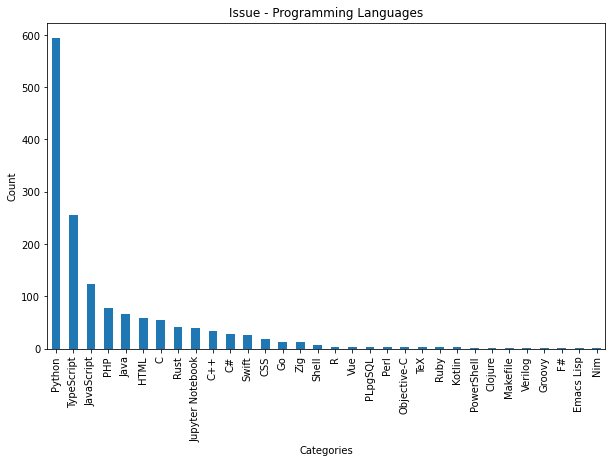

In [82]:
import matplotlib.pyplot as plt

issue_proglang = issue_final['RepoLanguage'].value_counts()
# Increase the width by setting the figsize
plt.figure(figsize=(10, 6))

# Plot the bar chart
issue_proglang.plot(kind='bar')

# Customize the plot
plt.title('Issue - Programming Languages')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()

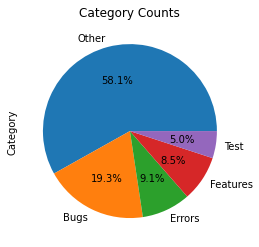

In [84]:
import matplotlib.pyplot as plt

issue_category = issue_final['Category'].value_counts()

# Plot the pie chart with percentages
issue_category.plot(kind='pie', autopct='%1.1f%%')

# Customize the plot
plt.title('Category Counts')

# Show the plot
plt.show()


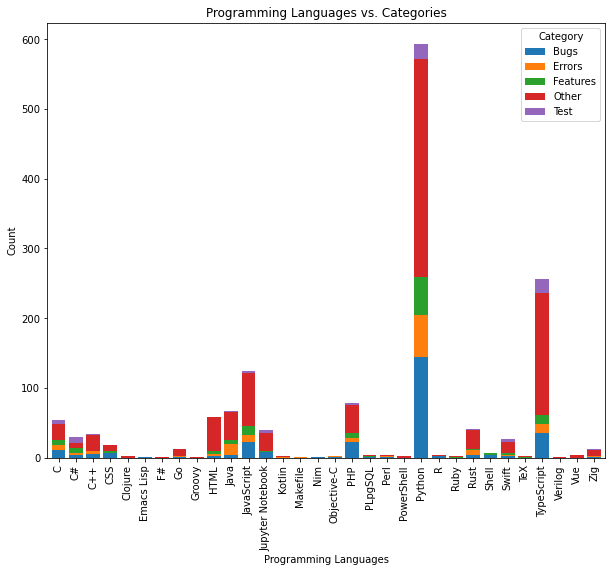

In [118]:
# Grouping data
import matplotlib.pyplot as plt
issue_grouped_data = issue_final.groupby(['RepoLanguage', 'Category']).size().unstack().fillna(0)

# Sorting columns in increasing order
issue_grouped_data = issue_grouped_data.reindex(sorted(issue_grouped_data.columns), axis=1)

# Plotting with adjusted width
issue_grouped_data.plot(kind='bar', stacked=True, width = 0.8, figsize=(10, 8))  # Adjust the width as needed
plt.title('Programming Languages vs. Categories')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.show()


### Analysis on file sharing

In [85]:
import langdetect
from nltk.tokenize import word_tokenize

def file_prompts(prompt):
    try:
        language = langdetect.detect(prompt)
        if language != 'en':
            return 'Non-English'
    except langdetect.lang_detect_exception.LangDetectException:
        # Handle the case where language detection fails
        pass
    
    prompt = prompt.lower()
    categories = {
        "Bugs": ["refactor", "code","problem", "bug", "issue", "analysis", "Exception handling", "Exception", "handling", "leaks", "debugging"],
        "Features": ["filter","list", "sort", "feature", "enhancement", "add", "improve", "Optimize", "Optimization", "experience", "Scalability", "strategies"],
        "Errors": ["files","class","error", "failed", "crash", "exception", "error message", "compatibility", "validation", "null pointer", "concurrency"],
        "Test": ["need", "test", "check", "compare", "affect", "unit", "integration", "coverage", "end-to-end", "regression", "mocking", "stubbing","WebDriver", "Selenium",
                "Production", "Docker", "Agile", "Waterfall"]
    }

    tokens = word_tokenize(prompt)

    for category, keywords in categories.items():
        if any(keyword in tokens for keyword in keywords):
            return category
    return "Other"

# Apply the categorize_prompt function using a lambda function
file_sharing1['Category'] = file_sharing1['Prompt'].apply(lambda x: file_prompts(x))

# Print the DataFrame with the added 'Category' column
print(file_sharing1.head())

file_data = pd.DataFrame(file_sharing1)
file_data.head(10)

   RepoLanguage                               Title  \
7    TypeScript             AI for Literacy Queries   
8    TypeScript            Literacy Gap Root Causes   
9          Java  EdgeChains: Generative AI Language   
10         Java  EdgeChains: Generative AI Language   
11         Java  EdgeChains: Generative AI Language   

                                               Prompt Category  
7   You are an expert search query generator.\n\nI...     Bugs  
8   Please analyse the text below to find the root...     Bugs  
9             https://github.com/arakoodev/EdgeChains    Other  
10  can this be used from python:\nhttps://github....    Other  
11                                 give me an example    Other  


,RepoLanguage,Title,Prompt,Category
7,TypeScript,AI for Literacy Queries,You are an expert search query generator.\n\nI...,Bugs
8,TypeScript,Literacy Gap Root Causes,Please analyse the text below to find the root...,Bugs
9,Java,EdgeChains: Generative AI Language,https://github.com/arakoodev/EdgeChains,Other
10,Java,EdgeChains: Generative AI Language,can this be used from python:\nhttps://github....,Other
11,Java,EdgeChains: Generative AI Language,give me an example,Other
12,Python,Audio Visualizer Video Script,Write me python3 script that takes in mp3 audi...,Other
41,Java,Java class in container,How to run a java class inside of a container ...,Errors
42,Java,,How to add a java class in a generic container...,Features
43,Java,,Show me code only,Bugs
44,HTML,ハンバーガーメニュー表示の修正,あなたはwebデザイナーです。ハンバーガーメニューを実装したところ、初めからメニューの内容が...,Other


In [86]:
file_final = file_data[file_data['Category'] != 'Non-English']
file_final

,RepoLanguage,Title,Prompt,Category
7,TypeScript,AI for Literacy Queries,You are an expert search query generator.\n\nI...,Bugs
8,TypeScript,Literacy Gap Root Causes,Please analyse the text below to find the root...,Bugs
9,Java,EdgeChains: Generative AI Language,https://github.com/arakoodev/EdgeChains,Other
10,Java,EdgeChains: Generative AI Language,can this be used from python:\nhttps://github....,Other
11,Java,EdgeChains: Generative AI Language,give me an example,Other
...,...,...,...,...
2025,TypeScript,Multiple IP on Linux,Let's go back to when we have 2 interfaces (in...,Test
2026,Jupyter Notebook,Rewriting FSRS Tutorial,"You are a professional explainer, tutor and wr...",Other
2029,TypeScript,TypeScript: No Checked Exceptions,I wish that in typescript I could mark a funct...,Errors
2030,TypeScript,TypeScript: No Checked Exceptions,Are there no other options that use static ana...,Bugs


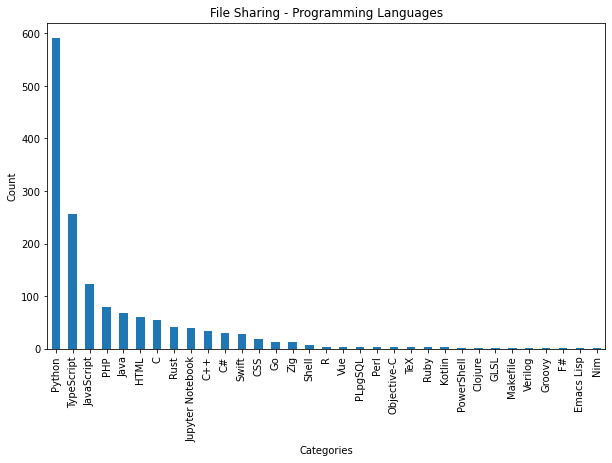

In [87]:
import matplotlib.pyplot as plt

file_proglang = file_final['RepoLanguage'].value_counts()
# Increase the width by setting the figsize
plt.figure(figsize=(10, 6))

# Plot the bar chart
file_proglang.plot(kind='bar')

# Customize the plot
plt.title('File Sharing - Programming Languages')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()

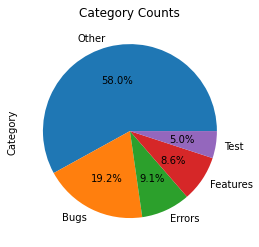

In [92]:
file_category = file_final['Category'].value_counts()
file_category.plot(kind='pie', autopct='%1.1f%%')

# Customize the plot
plt.title('Category Counts')
# Show the plot
plt.show()

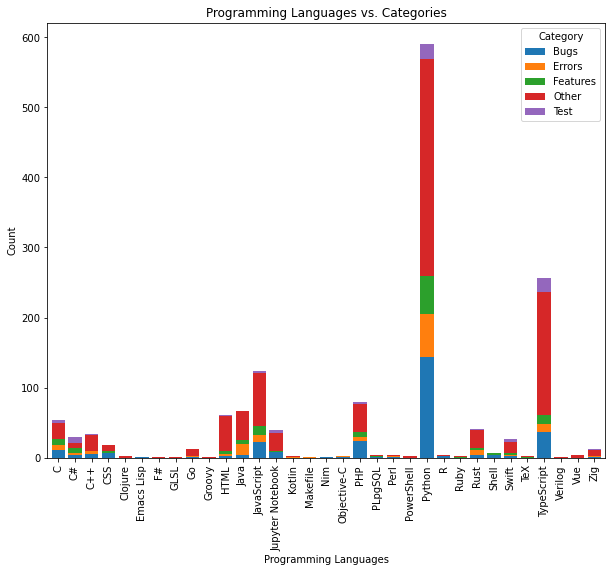

In [119]:
# Grouping data
import matplotlib.pyplot as plt
file_grouped_data = file_final.groupby(['RepoLanguage', 'Category']).size().unstack().fillna(0)

# Sorting columns in increasing order
file_grouped_data = file_grouped_data.reindex(sorted(file_grouped_data.columns), axis=1)

# Plotting with adjusted width
file_grouped_data.plot(kind='bar', stacked=True, width = 0.8, figsize=(10, 8))  # Adjust the width as needed
plt.title('Programming Languages vs. Categories')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.show()


### Analysis on PR sharing

In [89]:
import langdetect
from nltk.tokenize import word_tokenize

def pr_prompts(prompt):
    try:
        language = langdetect.detect(prompt)
        if language != 'en':
            return 'Non-English'
    except langdetect.lang_detect_exception.LangDetectException:
        # Handle the case where language detection fails
        pass
    
    prompt = prompt.lower()
    categories = {
        "Bugs": ["refactor", "code","problem", "bug", "issue", "analysis", "Exception handling", "Exception", "handling", "leaks", "debugging"],
        "Features": ["filter","list", "sort","feature", "enhancement", "add", "improve", "Optimize", "Optimization", "experience", "Scalability", "strategies"],
        "Errors": ["files","class","error", "failed", "crash", "exception", "error message", "compatibility", "validation", "null pointer", "concurrency"],
        "Test": ["need", "test", "check", "compare", "affect", "unit", "integration", "coverage", "end-to-end", "regression", "mocking", "stubbing","WebDriver", "Selenium",
                "Production", "Docker", "Agile", "Waterfall"]
    }

    tokens = word_tokenize(prompt)

    for category, keywords in categories.items():
        if any(keyword in tokens for keyword in keywords):
            return category
    return "Other"

# Apply the categorize_prompt function using a lambda function
pr_sharing1['Category'] = pr_sharing1['Prompt'].apply(lambda x: pr_prompts(x))

# Print the DataFrame with the added 'Category' column
print(pr_sharing1.head())

pr_data = pd.DataFrame(pr_sharing1)
pr_data.head(10)

  RepoLanguage                                  Title  \
0   JavaScript               Regex Testing Assistance   
1   JavaScript               Regex Testing Assistance   
2   JavaScript  Imperative vs Declarative Programming   
3   TypeScript            Avoid Prototype Chain Issue   
4           Go                 Empty String in Base64   

                                              Prompt     Category  
0                           can u be my regex tester        Other  
1  /^(\+?98[\-\s]?|0)9[0-39]\d[\-\s]?\d{3}[\-\s]?...  Non-English  
2  Explain the difference between imperative and ...     Features  
3  I have this code:\n\nconst characterMap: Chara...         Bugs  
4  Hello ChatGPT, do you know if an empty string ...        Other  


,RepoLanguage,Title,Prompt,Category
0,JavaScript,Regex Testing Assistance,can u be my regex tester,Other
1,JavaScript,Regex Testing Assistance,/^(\+?98[\-\s]?|0)9[0-39]\d[\-\s]?\d{3}[\-\s]?...,Non-English
2,JavaScript,Imperative vs Declarative Programming,Explain the difference between imperative and ...,Features
3,TypeScript,Avoid Prototype Chain Issue,I have this code:\n\nconst characterMap: Chara...,Bugs
4,Go,Empty String in Base64,"Hello ChatGPT, do you know if an empty string ...",Other
5,Jupyter Notebook,Security Risks in User-Specified Functions,lets say I have a some pydantic code like \n\n...,Bugs
8,Vue,ScreenTime Tracker Algorithm,I'm building an app that tracks screentime.\n\...,Bugs
9,Vue,ScreenTime Tracker Algorithm,But won't this make a messy list for the user?...,Features
10,Vue,ScreenTime Tracker Algorithm,Very good. Turn it into a function and write a...,Test
11,Jupyter Notebook,Building Stable Diffusion Image History,rewrite this code to give each top level <li> ...,Bugs


In [90]:
pr_final = pr_data[pr_data['Category'] != 'Non-English']
pr_final

,RepoLanguage,Title,Prompt,Category
0,JavaScript,Regex Testing Assistance,can u be my regex tester,Other
2,JavaScript,Imperative vs Declarative Programming,Explain the difference between imperative and ...,Features
3,TypeScript,Avoid Prototype Chain Issue,I have this code:\n\nconst characterMap: Chara...,Bugs
4,Go,Empty String in Base64,"Hello ChatGPT, do you know if an empty string ...",Other
5,Jupyter Notebook,Security Risks in User-Specified Functions,lets say I have a some pydantic code like \n\n...,Bugs
...,...,...,...,...
989,C++,Understanding Grid Size Calculation,"it kind of feels like the expression, if a tre...",Other
990,C++,Understanding Grid Size Calculation,If an OpenAI engineer to learn about our discu...,Features
991,C++,Understanding Grid Size Calculation,what would be a good name for this test?,Test
993,C++,Mutating Properties in Rust,Here is some rust code:\n\n```\nlet conn =\n ...,Bugs


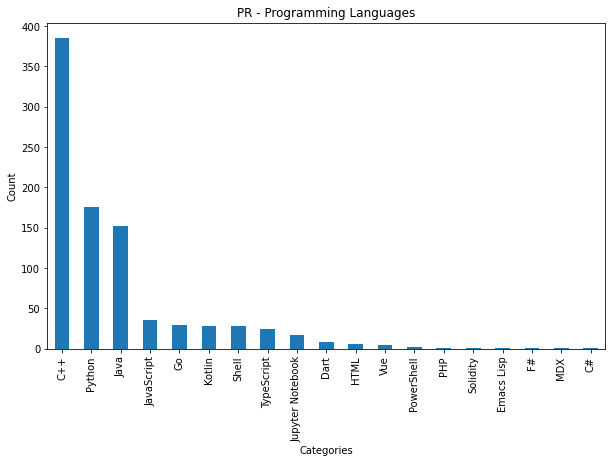

In [91]:
import matplotlib.pyplot as plt

pr_proglang = pr_final['RepoLanguage'].value_counts()
# Increase the width by setting the figsize
plt.figure(figsize=(10, 6))

# Plot the bar chart
pr_proglang.plot(kind='bar')

# Customize the plot
plt.title('PR - Programming Languages')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show the plot
plt.show()

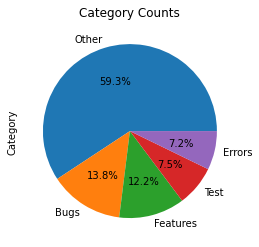

In [97]:
pr_category = pr_final['Category'].value_counts()
pr_category.plot(kind='pie', autopct='%1.1f%%')

# Customize the plot
plt.title('Category Counts')
# Show the plot
plt.show()

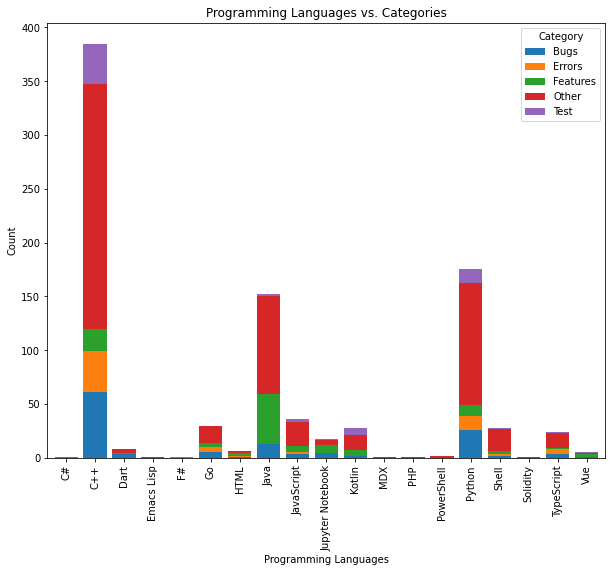

In [120]:
# Grouping data
import matplotlib.pyplot as plt
pr_grouped_data = pr_final.groupby(['RepoLanguage', 'Category']).size().unstack().fillna(0)

# Sorting columns in increasing order
pr_grouped_data = pr_grouped_data.reindex(sorted(pr_grouped_data.columns), axis=1)

# Plotting with adjusted width
pr_grouped_data.plot(kind='bar', stacked=True, width = 0.8, figsize=(10, 8))  # Adjust the width as needed
plt.title('Programming Languages vs. Categories')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.show()


In [98]:
final_df

,RepoLanguage,Title,Prompt
0,HTML,Adjust Button for Keyboard,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...
1,HTML,"I am ChatGPT, a language model AI developed by...",このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...
2,HTML,Refactor HTML and JavaScript,refactor this code.\n\n<!DOCTYPE html>\n<html>...
3,CSS,Server Code Organization,server.js\n// Required libraries\nimport cors ...
4,CSS,Server Code Organization,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve..."
...,...,...,...
991,C++,Understanding Grid Size Calculation,what would be a good name for this test?
992,C++,用語の選択,こちらの変更に対して、\n\n- /// 与えられたパスからモデルを取得する\n+ ...
993,C++,Mutating Properties in Rust,Here is some rust code:\n\n```\nlet conn =\n ...
994,C++,Rustでのデフォルト関数,この2つの処理は一緒でしょうか？\n\nconst convertHankakuToZenk...
